## Imports and Data Loading

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from IPython.display import display, HTML
from sklearn.metrics import roc_auc_score, roc_curve, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import ScalarFormatter
from sklearn.neural_network import MLPClassifier
import shap

c:\Users\larry\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading 2013-2014 NHANES Data

In [2]:
# Read the CSV files into dfs
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

### Loading 2015-2016

In [3]:
df_15_16 = pd.read_csv('merged_data.csv')
# Set numbers between 0 and 0.0001 to 0
df_15_16 = df_15_16.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\3328956275.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_15_16 = df_15_16.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)


### Loading 2011-12 

In [4]:
df_11_12 = pd.read_csv('merged_2011_2012.csv')

df_11_12 = df_11_12.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\3453741107.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_11_12 = df_11_12.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)


### Loading 2017-18 

In [5]:
df_17_18 = pd.read_csv('merged_2017_2018.csv')

df_17_18 = df_17_18.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\1951393457.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_17_18 = df_17_18.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)


In [6]:
df_09_10 = pd.read_csv('merged_2009_2010.csv')

df_09_10 = df_09_10.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)

df_09_10['ALQ151'] = df_09_10['ALQ150']  # Rename ALQ150 to ALQ151

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\3672275837.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_09_10 = df_09_10.applymap(lambda x: 0 if isinstance(x, (int, float)) and 0 < x < 0.0001 else x)


### Merging Data into single DF

In [7]:
# Merge the dfs on the 'seqn' column
df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

print(df.shape)

df = pd.concat([df, df_15_16], ignore_index=True)

# Print the merged df
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df.shape)


(9813, 1389)
(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(19784, 1410)


### Choosing columns

In [8]:
columns_to_keep_17 = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSPREP', 'DIQ010','PAQ650', 'PAQ665', 'ALQ111','ALQ121','ALQ151', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SMQ050Q', 'SMQ050U', 'SMD057', 'SMD641', 'SMD650', 'SMD030',
    'MCQ160F'
]

df_17_18=df_17_18[columns_to_keep_17]

df_17_18=df_17_18[df_17_18['RIDAGEYR']>=18]


In [9]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSPREP', 'DIQ010','PAQ650', 'PAQ665', 'ALQ101','ALQ151', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SMQ050Q', 'SMQ050U', 'SMD055', 'SMD057', 'SMD641', 'SMD650', 'SMD030',
    'MCQ160F'
]

# Drop all columns except for the specified ones
df = df[columns_to_keep]

df_testing = df_11_12[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
df = df[df['RIDAGEYR'] >= 18]

df_testing = df_testing[df_testing['RIDAGEYR'] >= 18]

df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3,...,DBQ700,HSD010,SMQ050Q,SMQ050U,SMD055,SMD057,SMD641,SMD650,SMD030,MCQ160F
0,73557.0,1.0,69.0,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,2.0,2.0,3.0,4.0,66.0,2.0,NaN,NaN,17.0,1.0
1,73558.0,1.0,54.0,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,3.0,4.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0
2,73559.0,1.0,72.0,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,3.0,3.0,40.0,4.0,26.0,3.0,NaN,NaN,20.0,2.0
4,73561.0,2.0,73.0,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,73562.0,1.0,56.0,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,5.0,5.0,16.0,4.0,40.0,5.0,NaN,NaN,18.0,2.0


### Filling nulls that can be imputed

In [10]:
# Filling Nulls Due to Skip Questions
df.loc[df['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']] = df.loc[df['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']].fillna(0)
df.loc[df['ALQ101'] == 2, ['ALQ151']] = df.loc[df['ALQ101'] == 2, ['ALQ151']].fillna(2)
df.loc[df['ALQ120Q'] == 0, ['ALQ130']] = df.loc[df['ALQ120Q'] == 0, ['ALQ130']].fillna(0)
df.loc[df['SMQ020'] != 1, ['SMQ040']] = df.loc[df['SMQ020'] != 1, ['SMQ040']].fillna(3)
df.loc[df['ALQ120Q'] <= 3, ['ALQ130']] = df.loc[df['ALQ120Q'] <= 3, ['ALQ130']].fillna(0)

# Filling Nulls Due to Skip Questions
df_testing.loc[df_testing['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']] = df_testing.loc[df_testing['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']].fillna(0)
df_testing.loc[df_testing['ALQ101'] == 2, ['ALQ151']] = df_testing.loc[df_testing['ALQ101'] == 2, ['ALQ151']].fillna(2)
df_testing.loc[df_testing['ALQ120Q'] == 0, ['ALQ130']] = df_testing.loc[df_testing['ALQ120Q'] == 0, ['ALQ130']].fillna(0)
df_testing.loc[df_testing['SMQ020'] != 1, ['SMQ040']] = df_testing.loc[df_testing['SMQ020'] != 1, ['SMQ040']].fillna(3)
df_testing.loc[df_testing['ALQ120Q'] <= 3, ['ALQ130']] = df_testing.loc[df_testing['ALQ120Q'] <= 3, ['ALQ130']].fillna(0)

df_17_18.loc[df_17_18['ALQ111'] == 2, ['ALQ121', 'ALQ130']] = df_17_18.loc[df_17_18['ALQ111'] == 2, ['ALQ121', 'ALQ130']].fillna(0)
df_17_18.loc[df_17_18['ALQ111'] == 2, ['ALQ151']] = df_17_18.loc[df_17_18['ALQ111'] == 2, ['ALQ151']].fillna(2)
df_17_18.loc[df_17_18['ALQ121'] == 0, ['ALQ130']] = df_17_18.loc[df_17_18['ALQ121'] == 0, ['ALQ130']].fillna(0)

df_17_18.loc[df_17_18['SMQ020'] != 1, ['SMQ040']] = df_17_18.loc[df_17_18['SMQ020'] != 1, ['SMQ040']].fillna(3)


### Improving Column Names

In [11]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI2': 'DiasBP2',
    'BPXDI3': 'DiasBP3',
    'BPXSY1': 'SysBP1',
    'BPXSY2': 'SysBP2',
    'BPXSY3': 'SysBP3',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'BPQ080': 'Cholesterol',
    'DRQSPREP': 'SaltFreq',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'ALQ151': 'AlcConsumpMoreThan4/5MostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ120U' : 'UnitAlc',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SMQ040': 'Smoker',
    'DMDEDUC2': 'EducationLvl',
    'DIQ010' : 'Diabetes',
    'SMD030' : 'AgeStartedSmokingReg',
    'SMQ050Q': 'TimeQuit',
    'SMD055': 'AgeLastSmokedReg',
    'SMD057': 'WhenSmokedCigs/Day',
    'SMD641': 'DaysSmokedInLast30',
    'SMD650': 'AvgCigs/DayInLast30',
    'MCQ160F': 'Stroke'
}

df.rename(columns=new_column_names, inplace=True)

df_testing.rename(columns=new_column_names, inplace=True)

df_17_18.rename(columns=new_column_names, inplace=True)

# Find columns that are in df but not in df_17_18
columns_in_df_not_in_df_17_18 = set(df.columns) - set(df_17_18.columns)

# Print the columns
print("Columns in df but not in df_17_18:")
print(columns_in_df_not_in_df_17_18)

# Find columns that are in df but not in df_17_18
columns_in_df_17_18_not_in_df = set(df_17_18.columns) - set(df.columns)

# Print the columns
print("Columns in df_17_18 but not in df:")
print(columns_in_df_17_18_not_in_df)


Columns in df but not in df_17_18:
{'AgeLastSmokedReg', 'UnitAlc', 'ALQ101', 'AlcConsumpFreq'}
Columns in df_17_18 but not in df:
{'ALQ121', 'ALQ111'}


## Feature Descriptions

### Cholesterol
- **Question:** Do you suffer from high cholesterol?

### Diet
- **Question:** Are you on a diet?

### Salt Frequency
- **Question:** How often do you add salt to your food?
  - 1 = Never
  - 2 = Rarely
  - 3 = Occasionally
  - 4 = Very Often

### Asthma
- **Question:** Have you ever been told you have asthma? (Refer to MCQ035 to check if you still have it)

### Stroke
- **Question:** Have you ever had a stroke?

### Vigorous Activity
- **Question:** Do you engage in any vigorous activity?

### Moderate Activity
- **Question:** Do you engage in any moderate activity?

### Over the Last 2 Weeks...
- **FeelPoorEating:** Have you been bothered by poor eating or appetite?
- **FeelTired:** Have you felt tired?
- **SleepTroubles:** Have you struggled to fall asleep, stay asleep, or slept too much?
- **FeelDepressed:** Have you felt depressed?

### Alcohol Consumption
- **AlcConsumpMoreThan4/5MostDays:** Have you ever consumed more than 4/5 drinks on most days?
- **AlcConsumpFreq:** How many days have you consumed alcohol in the past year?
- **AlcConsumpAmtPerDrinkDay:** On days you drank in the last year, on average, how many drinks did you have?

### Smoking
- **SMD030:** Age started smoking regularly (skip if < 100 cigs)
  - 7-64
  - 0 = Never regular
  - 80 = 80+
- **Smoker:** Do you currently smoke?
  - 1 = Every day
  - 2 = Some days
  - 3 = Never
- **SMQ050Q:** How long since you quit? (Skip if smoker = 1/2)
- **SMD055:** Age last smoked regularly (skip if still smokes/< 100 cigs)
- **SMD057:** When did you smoke, how many? (Skip if still smokes/< 100 cigs)
  - 1-90
  - 95+
- **SMD641:** Days smoked in the past 30 days (skip if not a current smoker)
- **SMD650:** Average number of cigarettes per day in the past 30 days (skip if not a current smoker)

### Overall Diet Health
- **Question:** How would you rate the health of your diet?
  - 1 = Excellent
  - 2 = Very good
  - 3 = Good
  - 4 = Fair
  - 5 = Poor

### General Health
- **Question:** How would you rate your general health condition?
  - 1 = Excellent
  - 2 = Very good
  - 3 = Good
  - 4 = Fair
  - 5 = Poor

### Sleep During Work Days
- **Question:** How much sleep do you get during work days?
  - 2-11 hours
  - 12 = 12+ hours

### Education Level
- **Question:** What is the highest level of school that you have completed?
  - 1 = Less than grade 9
  - 2 = Less than matriculated
  - 3 = High school graduate
  - 4 = Some college degree
  - 5 = College graduate or higher

### Diabetes
- **Question:** Has a doctor ever told you that you have diabetes?
  - 1 = Yes
  - 2 = No
  - 3 = Borderline

### Prediabetic
- **Question:** Has a doctor ever told you that you are prediabetic?


# Data Exploration

In [12]:
df.isnull().sum()

ID                                  0
Gender                              0
Age                                 0
EducationLvl                      609
DiasBP1                          1089
DiasBP2                           762
DiasBP3                           787
SysBP1                           1089
SysBP2                            762
SysBP3                            787
BMI                               407
Height                            386
Waist                             961
Weight                            390
Cholesterol                         0
SaltFreq                         1211
Diabetes                            0
VigActivity                         0
ModActivity                         0
ALQ101                           1287
AlcConsumpMoreThan4/5MostDays    1292
AlcConsumpFreq                   1289
UnitAlc                          2335
AlcConsumpAmtPerDrinkDay         1289
100Cigs                             0
Smoker                              0
OvrDietHealt

In [13]:
def plot_bivariate(col, hue):
    if df[col].nunique() > 5:
        plt.figure(figsize=(20, 10))
        rot = 90
    else:
        plt.figure(figsize=(10, 7))
        rot = 0

    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers]  # Get the counts of each bar, make arrays when more than one in group
        min_length = min(len(group) for group in heights)  # Find the minimum length of the groups
        for bars in ax.containers:
            for i, p in enumerate(bars):
                if i >= min_length:
                    continue  # Skip if index is out of range for any group
                total = sum(group[i] for group in heights)  # Sum total of each group
                percentage = (100 * p.get_height() / total)  # Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() * 0.5, 0.8 * p.get_height()), 
                            ha='center', va='bottom', rotation=0)
                if percentage > 25.0:
                    percentage = f'{percentage:.1f}%'
                    ax.annotate(percentage, (p.get_x() + p.get_width() * 0.5, 0.25 * p.get_height()), 
                                ha='center', va='center', rotation=rot)

    plot = sns.countplot(x=df[col], hue=df[hue], palette='pastel')
    percentage(plot)
    plt.xticks(rotation=rot)
    plt.show()

In [14]:
def calculate_average(df, features, new_feature_name):
    # Check and select the relevant columns from the df
    relevant_columns = df[features].replace({0: np.nan})  # Replace zeros with NaN to exclude from mean calculation
    
    # Calculate the mean across the specified columns, ignoring NaN values
    df[new_feature_name] = relevant_columns.mean(axis=1, skipna=True)

## Creating BP features

In [15]:
diasBP_features = ['DiasBP1', 'DiasBP2', 'DiasBP3']
sysBP_features = ['SysBP1', 'SysBP2', 'SysBP3']

calculate_average(df, diasBP_features, 'AvgDiasBP')
calculate_average(df, sysBP_features, 'AvgSysBP')

calculate_average(df_testing, diasBP_features, 'AvgDiasBP')
calculate_average(df_testing, sysBP_features, 'AvgSysBP')

calculate_average(df_17_18, diasBP_features, 'AvgDiasBP')
calculate_average(df_17_18, sysBP_features, 'AvgSysBP')

In [16]:
# Drop rows where AvgSysBP is null
df = df.dropna(subset=['AvgSysBP'])
df_testing = df_testing.dropna(subset=['AvgSysBP'])
df_17_18 = df_17_18.dropna(subset=['AvgSysBP'])

## Creating a Hypertension Variable

In [17]:
conditions = [
    df['AvgSysBP'] < 130,
    (df['AvgSysBP'] >= 130)
]
values = [0, 1]

# Use np.select to handle NaNs and assign the appropriate category
df['HypertensionLvl'] = np.select(conditions, values, default=np.nan)

conditions_df_testing = [
    df_testing['AvgSysBP'] < 130,
    df_testing['AvgSysBP'] >= 130
]
df_testing['HypertensionLvl'] = np.select(conditions_df_testing, values, default=np.nan)

conditions_df_17_18 = [
    df_17_18['AvgSysBP'] < 130,
    df_17_18['AvgSysBP'] >= 130
]
df_17_18['HypertensionLvl'] = np.select(conditions_df_17_18, values, default=np.nan)

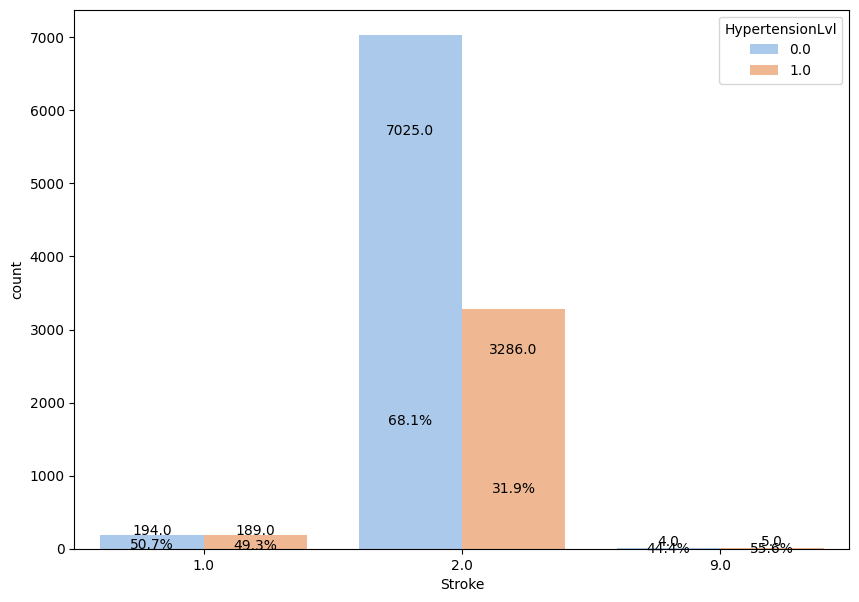

In [18]:
plot_bivariate('Stroke', 'HypertensionLvl')

## Creating Smoking Features

In [19]:
df.loc[df['TimeQuit'] == 66666, 'TimeQuit'] = 50
df_testing.loc[df_testing['TimeQuit'] == 66666, 'TimeQuit'] = 50
df_17_18.loc[df_17_18['TimeQuit'] == 66666, 'TimeQuit'] = 50

In [20]:
# Define the transformation function
def transform_time_quit(row):
    if row['SMQ050U'] == 1:
        return 0
    elif row['SMQ050U'] == 2:
        return (row['TimeQuit'] / 52)
    elif row['SMQ050U'] == 3:
        return (row['TimeQuit'] / 12)
    else:
        return row['TimeQuit']

# Apply the transformation to the TimeQuit column
df['TimeQuit'] = df.apply(transform_time_quit, axis=1)
df_testing['TimeQuit'] = df_testing.apply(transform_time_quit, axis=1)
df_17_18['TimeQuit'] = df_17_18.apply(transform_time_quit, axis=1)


In [21]:
df_17_18 = df_17_18.drop(df_17_18[df_17_18['TimeQuit'] > 100].index)

In [22]:
# Update AgeLastSmokedReg where it is null, TimeQuit is not null, and TimeQuit is smaller than 100
df.loc[(df['AgeLastSmokedReg'].isnull()) & (df['TimeQuit'].notnull()) & (df['TimeQuit'] < 100) & (df['Smoker'] == 3) & (df['100Cigs'] == 1), 'AgeLastSmokedReg'] = df['Age'] - df['TimeQuit']
df_testing.loc[(df_testing['AgeLastSmokedReg'].isnull()) & (df_testing['TimeQuit'].notnull()) & (df_testing['TimeQuit'] < 100) & (df_testing['Smoker'] == 3) & (df_testing['100Cigs'] == 1), 'AgeLastSmokedReg'] = df_testing['Age'] - df_testing['TimeQuit']

### Creating YearsSmoked Feature

In [23]:
df.loc[df['AgeStartedSmokingReg'] > 100, 'AgeStartedSmokingReg'] = np.nan

df_testing.loc[df_testing['AgeStartedSmokingReg'] > 100, 'AgeStartedSmokingReg'] = np.nan

df_17_18.loc[df_17_18['AgeStartedSmokingReg'] > 100, 'AgeStartedSmokingReg'] = np.nan

df.loc[df['TimeQuit'] > 66666, 'TimeQuit'] = np.nan

df_testing.loc[df_testing['TimeQuit'] > 66666, 'TimeQuit'] = np.nan

df_17_18.loc[df_17_18['TimeQuit'] > 66666, 'TimeQuit'] = np.nan

df.loc[df['AgeLastSmokedReg'] > 100, 'AgeLastSmokedReg'] = np.nan

df_testing.loc[df_testing['AgeLastSmokedReg'] > 100, 'AgeLastSmokedReg'] = np.nan

df = df.drop(columns=['SMQ050U'])

df_testing = df_testing.drop(columns=['SMQ050U'])

df_17_18 = df_17_18.drop(columns=['SMQ050U'])


df['yearsSmoked'] = np.where(
    df['Smoker'].isin([1, 2]),
    df['Age'] - df['AgeStartedSmokingReg'],
    df['AgeLastSmokedReg'] - df['AgeStartedSmokingReg']
)

df_testing['yearsSmoked'] = np.where(
    df_testing['Smoker'].isin([1, 2]),
    df_testing['Age'] - df_testing['AgeStartedSmokingReg'],
    df_testing['AgeLastSmokedReg'] - df_testing['AgeStartedSmokingReg']
)

df_17_18['yearsSmoked'] = np.where(
    df_17_18['Smoker'].isin([1, 2]),
    df_17_18['Age'] - df_17_18['AgeStartedSmokingReg'],
    df_17_18['Age'] - df_17_18['AgeStartedSmokingReg'] - df_17_18['TimeQuit']
)

df['yearsSmoked'] = df['yearsSmoked'].fillna(0)
df_testing['yearsSmoked'] = df_testing['yearsSmoked'].fillna(0)
df_17_18['yearsSmoked'] = df_17_18['yearsSmoked'].fillna(0)

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\3170566072.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('yearsSmokedBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


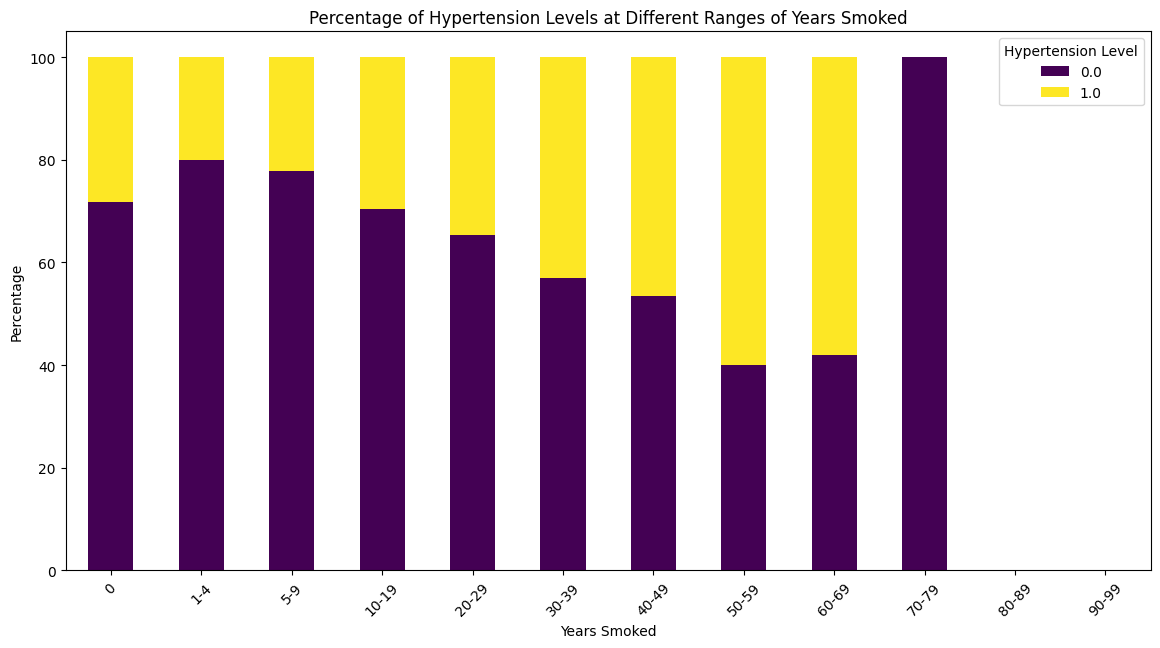

In [24]:
# Bin the yearsSmoked values
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0', '1-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['yearsSmokedBinned'] = pd.cut(df['yearsSmoked'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of yearsSmoked
hypertension_percentage = df.groupby('yearsSmokedBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels at Different Ranges of Years Smoked')
plt.xlabel('Years Smoked')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

### Creating LifetimeCigarettes Feature

In [25]:
# Define the transformation function
def calculate_lifetime_cigarettes(row):
    if row['Smoker'] == 3:
        if pd.isnull(row['WhenSmokedCigs/Day']) | (row['WhenSmokedCigs/Day'] > 100):
            return 0
        return row['yearsSmoked'] * row['WhenSmokedCigs/Day'] * 365
    elif row['Smoker'] in [1, 2]:
        if pd.isnull(row['AvgCigs/DayInLast30']) | (row['AvgCigs/DayInLast30'] > 100):
            return 0
        return row['yearsSmoked'] * row['AvgCigs/DayInLast30'] * row['DaysSmokedInLast30'] /30 * 365
    else:
        return np.nan

# Apply the transformation to create the lifetimeCigarettes feature
df['lifetimeCigarettes'] = df.apply(calculate_lifetime_cigarettes, axis=1)
df_testing['lifetimeCigarettes'] = df_testing.apply(calculate_lifetime_cigarettes, axis=1)
df_17_18['lifetimeCigarettes'] = df_17_18.apply(calculate_lifetime_cigarettes, axis=1)

# Verify the changes
print(df[['Smoker', 'yearsSmoked', 'WhenSmokedCigs/Day', 'AvgCigs/DayInLast30', 'DaysSmokedInLast30', 'lifetimeCigarettes']].head(20))

    Smoker  yearsSmoked  WhenSmokedCigs/Day  AvgCigs/DayInLast30  \
0      3.0    49.000000                 2.0                  NaN   
1      2.0    54.000000                 NaN                  1.0   
2      3.0     6.000000                 3.0                  NaN   
4      3.0     0.000000                 NaN                  NaN   
5      3.0    22.000000                 5.0                  NaN   
7      3.0     0.000000                 NaN                  NaN   
8      1.0    23.000000                 NaN                  1.0   
9      1.0    44.000000                 NaN                 25.0   
10     3.0     0.000000                 NaN                  NaN   
12     3.0     0.000000                 NaN                  NaN   
15     3.0     0.000000                 NaN                  NaN   
18     3.0    21.333333                20.0                  NaN   
19     3.0     0.000000                 NaN                  NaN   
21     3.0     0.000000                 NaN     

C:\Users\larry\AppData\Local\Temp\ipykernel_18940\2307530192.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('lifetimeCigarettesBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


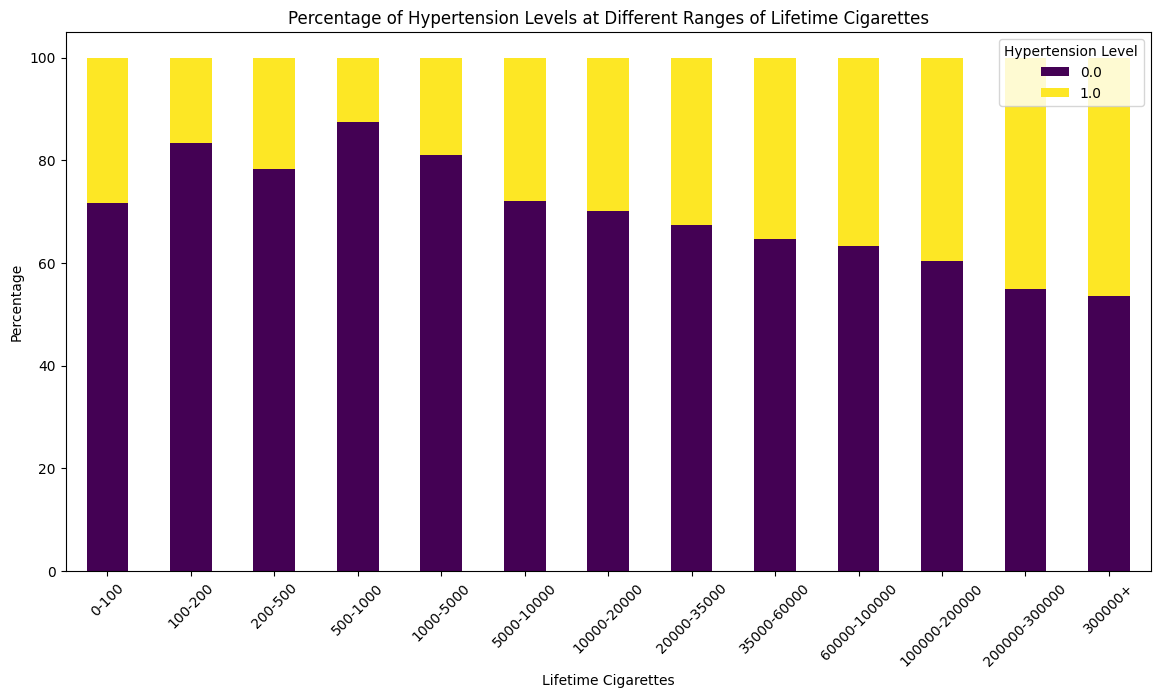

In [26]:
# Bin the lifetimeCigarettes values
bins = [0, 100, 200, 500, 1000, 5000, 10000, 20000, 35000, 60000, 100000, 200000, 300000, 1000000000000]
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000-10000', '10000-20000', '20000-35000', '35000-60000', '60000-100000', '100000-200000', '200000-300000', '300000+']
df['lifetimeCigarettesBinned'] = pd.cut(df['lifetimeCigarettes'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of lifetimeCigarettes
hypertension_percentage = df.groupby('lifetimeCigarettesBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels at Different Ranges of Lifetime Cigarettes')
plt.xlabel('Lifetime Cigarettes')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

In [27]:
df = df.drop(columns=['yearsSmokedBinned', 'lifetimeCigarettesBinned', 'AgeLastSmokedReg'])

In [28]:
# Find columns that are in df but not in df_17_18
columns_in_df_not_in_df_17_18 = set(df.columns) - set(df_17_18.columns)

# Print the columns
print("Columns in df but not in df_17_18:")
print(columns_in_df_not_in_df_17_18)

# Find columns that are in df but not in df_17_18
columns_in_df_17_18_not_in_df = set(df_17_18.columns) - set(df.columns)

# Print the columns
print("Columns in df_17_18 but not in df:")
print(columns_in_df_17_18_not_in_df)

Columns in df but not in df_17_18:
{'UnitAlc', 'ALQ101', 'AlcConsumpFreq'}
Columns in df_17_18 but not in df:
{'ALQ121', 'ALQ111'}


## Alcohol Features

In [29]:
def transform_alc_consump_freq(row):
    if row['UnitAlc'] == 1:
        return (row['AlcConsumpFreq'] * 52)
    elif row['UnitAlc'] == 2:
        return (row['AlcConsumpFreq'] * 12)
    else:
        if (row['AlcConsumpFreq'] > 365):
            return np.nan
        return row['AlcConsumpFreq']
    

df['AlcConsumpFreq'] = df.apply(transform_alc_consump_freq, axis=1)
df_testing['AlcConsumpFreq'] = df_testing.apply(transform_alc_consump_freq, axis=1)

In [30]:
def set_alc_consump_freq(df):
    # Define the mapping
    mapping = {
        1: 365,
        2: 300,
        3: 182,
        4: 104,
        5: 52,
        6: 30,
        7: 12,
        8: 9,
        9: 5,
        10: 2
    }
    
    # Apply the mapping
    df['AlcConsumpFreq'] = df['ALQ121'].apply(lambda x: mapping.get(x, 0) if x != '-' else 0)

# Apply the function to df_17_18
set_alc_consump_freq(df_17_18)

In [31]:
# Set values in 'AlcConsumpAmtPerDrinkDay' to NaN where the condition is met
df.loc[df['AlcConsumpAmtPerDrinkDay'] > 25, 'AlcConsumpAmtPerDrinkDay'] = np.nan
df_testing.loc[df_testing['AlcConsumpAmtPerDrinkDay'] > 25, 'AlcConsumpAmtPerDrinkDay'] = np.nan
df_17_18.loc[df_17_18['AlcConsumpAmtPerDrinkDay'] > 25, 'AlcConsumpAmtPerDrinkDay'] = np.nan

# Calculate the new column 'AlcConsump/Yr' by multiplying the relevant columns
df['AlcConsump/Yr'] = df['AlcConsumpAmtPerDrinkDay'] * df['AlcConsumpFreq']
df_testing['AlcConsump/Yr'] = df_testing['AlcConsumpAmtPerDrinkDay'] * df_testing['AlcConsumpFreq']
df_17_18['AlcConsump/Yr'] = df_17_18['AlcConsumpAmtPerDrinkDay'] * df_17_18['AlcConsumpFreq']

In [32]:
# Find columns that are in df but not in df_17_18
columns_in_df_not_in_df_17_18 = set(df.columns) - set(df_17_18.columns)
df = df.drop(columns=columns_in_df_not_in_df_17_18)

# Print the columns
print("Columns in df but not in df_17_18:")
print(columns_in_df_not_in_df_17_18)

# Find columns that are in df but not in df_17_18
columns_in_df_17_18_not_in_df = set(df_17_18.columns) - set(df.columns)
df_17_18 = df_17_18.drop(columns=columns_in_df_17_18_not_in_df)

# Print the columns
print("Columns in df_17_18 but not in df:")
print(columns_in_df_17_18_not_in_df)

Columns in df but not in df_17_18:
{'UnitAlc', 'ALQ101'}
Columns in df_17_18 but not in df:
{'ALQ121', 'ALQ111'}


In [33]:
# df = pd.concat([df, df_17_18], ignore_index=True)

## Activity Level Features

In [34]:
#Combine vig and mod activity

df['ActivityLvl'] = df.apply(
    lambda row: 1 if row['VigActivity'] == 1 
    else (0.5 if row['VigActivity'] != 1 and row['ModActivity'] == 1 else 0), axis=1
)
df_testing['ActivityLvl'] = df_testing.apply(
    lambda row: 1 if row['VigActivity'] == 1 
    else (0.5 if row['VigActivity'] != 1 and row['ModActivity'] == 1 else 0), axis=1
)

df['WeightedActivity'] = df.apply(
    lambda row: (row['VigActivity'] * 2 if row['VigActivity'] == 1 else 0) + 
                (row['ModActivity'] if row['ModActivity'] == 1 else 0), axis=1
)

df_testing['WeightedActivity'] = df_testing.apply(
    lambda row: (row['VigActivity'] * 2 if row['VigActivity'] == 1 else 0) + 
                (row['ModActivity'] if row['ModActivity'] == 1 else 0), axis=1
)

df_17_18['ActivityLvl'] = df_17_18.apply(
    lambda row: 1 if row['VigActivity'] == 1 
    else (0.5 if row['VigActivity'] != 1 and row['ModActivity'] == 1 else 0), axis=1
)
df_17_18['WeightedActivity'] = df_17_18.apply(
    lambda row: (row['VigActivity'] * 2 if row['VigActivity'] == 1 else 0) + 
                (row['ModActivity'] if row['ModActivity'] == 1 else 0), axis=1
)

In [35]:
df = df.dropna(thresh=len(df) - 5000, axis=1)
df_testing = df_testing.dropna(thresh=len(df_testing) - 2000, axis=1)
df.isnull().sum()

ID                                 0
Gender                             0
Age                                0
EducationLvl                     580
DiasBP1                          456
DiasBP2                          129
DiasBP3                          154
SysBP1                           456
SysBP2                           129
SysBP3                           154
BMI                              118
Height                            99
Waist                            575
Weight                           102
Cholesterol                        0
SaltFreq                         788
Diabetes                           0
VigActivity                        0
ModActivity                        0
AlcConsumpMoreThan4/5MostDays    884
AlcConsumpFreq                   888
AlcConsumpAmtPerDrinkDay         887
100Cigs                            0
Smoker                             0
OvrDietHealth                      0
GenHealth                        851
Stroke                           580
A

In [36]:
def adjust_activity(row):
    if row['Age'] < 30:
        return row['WeightedActivity'] + 1
        return row[health_feature]

In [37]:
# # Adjusting 'GenHealth' using the new function
# df['WeightedActivity'] = df.apply(lambda row: adjust_activity(row), axis=1)

# df_testing['WeightedActivity'] = df.apply(lambda row: adjust_activity(row), axis=1)

# df_17_18['WeightedActivity'] = df.apply(lambda row: adjust_activity(row), axis=1)

## Health 

In [38]:
def adjust_health(row, health_feature):
    if row['Age'] < 35:
        return row[health_feature] - 0.5
    elif 60 <= row['Age'] <= 80:
        return row[health_feature] + 0.5
    elif row['Age'] >= 80:
        return row[health_feature] + 1
    else:
        return row[health_feature]

In [39]:
# Adjusting 'GenHealth' using the new function
df['GenHealth'] = df.apply(lambda row: adjust_health(row, 'GenHealth'), axis=1)
df['OvrDietHealth'] = df.apply(lambda row: adjust_health(row, 'OvrDietHealth'), axis=1)

df_testing['GenHealth'] = df.apply(lambda row: adjust_health(row, 'GenHealth'), axis=1)
df_testing['OvrDietHealth'] = df.apply(lambda row: adjust_health(row, 'OvrDietHealth'), axis=1)

df_17_18['GenHealth'] = df.apply(lambda row: adjust_health(row, 'GenHealth'), axis=1)
df_17_18['OvrDietHealth'] = df.apply(lambda row: adjust_health(row, 'OvrDietHealth'), axis=1)

## Dropping unused features

In [40]:
df = df.drop(columns=['ID', 'DiasBP1', 'DiasBP2', 'DiasBP3', 'SysBP1', 
                      'SysBP2', 'SysBP3', 'AvgDiasBP', 'AlcConsumpMoreThan4/5MostDays', 
                       '100Cigs'])
df_testing = df_testing.drop(columns=['ID', 'DiasBP1', 'DiasBP2', 'DiasBP3', 'SysBP1',
                                  'SysBP2', 'SysBP3', 'AvgDiasBP', 'AlcConsumpMoreThan4/5MostDays',
                                  '100Cigs'])
null_values = df.isnull().sum()

In [41]:
df = df.dropna()
df_testing = df_testing.dropna()

### Removing rows from training that go against the desired trends

In [42]:
# Define the conditions
conditions = (
    (df['Age'] < 45) &
    (df['BMI'] < 26) &
    (df['Waist'] < 130) &
    (df['yearsSmoked'] < 2) &
    (df['WeightedActivity'] > 0) &
    (df['HypertensionLvl'] > 0) &
    (df['AlcConsump/Yr'] < 200)
)

# Filter the DataFrame based on the conditions
filtered_df = df[conditions]

# Drop all rows that meet the conditions
df.drop(df[conditions].index, inplace=True)

In [43]:
conditions = (
    (df['Age'] > 55) &
    (df['BMI'] > 30) &
    (df['yearsSmoked'] > 10) &
    (df['WeightedActivity'] < 1) &
    (df['HypertensionLvl'] == 0) 
)
filtered_df = df[conditions]
df.drop(df[conditions].index, inplace=True)

In [44]:
conditions = (
    (df['Age'] > 55) &
    (df['BMI'] > 30) &
    (df['AlcConsump/Yr'] > 200) &
    (df['WeightedActivity'] < 1) &
    (df['HypertensionLvl'] == 0) 
)
filtered_df = df[conditions]
df.drop(df[conditions].index, inplace=True)

In [45]:
for column in df.columns:
    print(f"Maximum value for {column}: {df[column].max()}")

Maximum value for Gender: 2.0
Maximum value for Age: 80.0
Maximum value for EducationLvl: 9.0
Maximum value for BMI: 70.1
Maximum value for Height: 202.7
Maximum value for Waist: 172.5
Maximum value for Weight: 198.9
Maximum value for Cholesterol: 9.0
Maximum value for SaltFreq: 9.0
Maximum value for Diabetes: 9.0
Maximum value for VigActivity: 9.0
Maximum value for ModActivity: 9.0
Maximum value for AlcConsumpFreq: 365.0
Maximum value for AlcConsumpAmtPerDrinkDay: 25.0
Maximum value for Smoker: 3.0
Maximum value for OvrDietHealth: 9.5
Maximum value for GenHealth: 5.5
Maximum value for Stroke: 9.0
Maximum value for AvgSysBP: 231.33333333333334
Maximum value for HypertensionLvl: 1.0
Maximum value for yearsSmoked: 71.0
Maximum value for lifetimeCigarettes: 1664400.0
Maximum value for AlcConsump/Yr: 6552.0
Maximum value for ActivityLvl: 1.0
Maximum value for WeightedActivity: 3.0


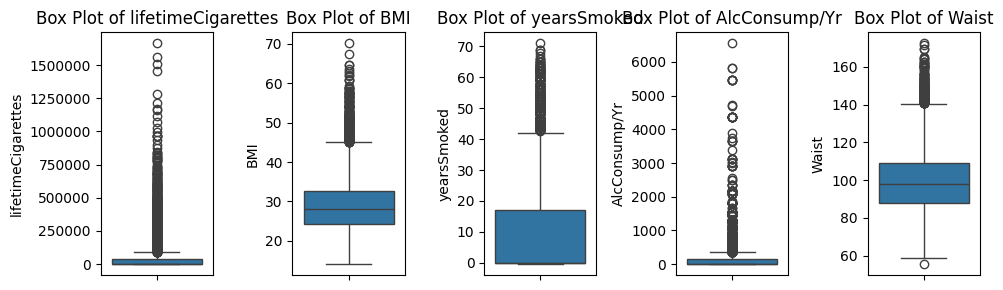

In [46]:
# Create a figure and axis
fig, ax = plt.subplots(1, 5, figsize=(10, 3))

# Create a box plot for Age
sns.boxplot(y=df['lifetimeCigarettes'], ax=ax[0])
ax[0].set_title('Box Plot of lifetimeCigarettes')

ax[0].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax[0].ticklabel_format(style='plain', axis='y')

# Create a box plot for BMI
sns.boxplot(y=df['BMI'], ax=ax[1])
ax[1].set_title('Box Plot of BMI')

sns.boxplot(y=df['yearsSmoked'], ax=ax[2])
ax[2].set_title('Box Plot of yearsSmoked')

sns.boxplot(y=df['AlcConsump/Yr'], ax=ax[3])
ax[3].set_title('Box Plot of AlcConsump/Yr')

sns.boxplot(y=df['Waist'], ax=ax[4])
ax[4].set_title('Box Plot of Waist')

# Display the plots
plt.tight_layout()
plt.show()

### Setting outlier values to a value that maintain the relationship but will not negatively affect models

In [47]:
# Cap lifetimeCigarettes at 400,000
df.loc[df['lifetimeCigarettes'] > 400000, 'lifetimeCigarettes'] = 400000
df_testing.loc[df_testing['lifetimeCigarettes'] > 400000, 'lifetimeCigarettes'] = 400000

# Cap BMI at 45
df.loc[df['BMI'] > 45, 'BMI'] = 45
df_testing.loc[df_testing['BMI'] > 45, 'BMI'] = 45

# Cap yearsSmoked at 45
df.loc[df['yearsSmoked'] > 45, 'yearsSmoked'] = 45
df_testing.loc[df_testing['yearsSmoked'] > 45, 'yearsSmoked'] = 45

# Cap AlcConsump/Yr at 900
df.loc[df['AlcConsump/Yr'] > 900, 'AlcConsump/Yr'] = 900
df_testing.loc[df_testing['AlcConsump/Yr'] > 900, 'AlcConsump/Yr'] = 900

# Cap waist at 150 and set minimum waist to 60
df.loc[df['Waist'] > 150, 'Waist'] = 150
df_testing.loc[df_testing['Waist'] > 150, 'Waist'] = 150
df.loc[df['Waist'] < 60, 'Waist'] = 60
df_testing.loc[df_testing['Waist'] < 60, 'Waist'] = 60

### Fixing any refused-to-answer fields

In [48]:
# Set Cholesterol, SaltFreq, Diabetes, OvrDietHealth to their mode when they equal 9
for column in ['Cholesterol', 'SaltFreq', 'Diabetes', 'OvrDietHealth', 'EducationLvl', 'Stroke']:
    if not df[column].dropna().empty:  # Check if column is not entirely NaN or empty
        mode_value = df[column].mode()
        if not mode_value.empty:  # Check if mode calculation returned a value
            mode_value = mode_value[0]
            df.loc[(df[column] >= 6.5) | (df[column] > 6), column] = mode_value
        else:
            print(f"No mode found for {column}.")
    else:
        print(f"Column {column} is empty or has only NaN values.")

for column in ['Cholesterol', 'SaltFreq', 'Diabetes', 'OvrDietHealth', 'EducationLvl']:
    if not df_testing[column].dropna().empty:  # Check if column is not entirely NaN or empty
        mode_value = df_testing[column].mode()
        if not mode_value.empty:  # Check if mode calculation returned a value
            mode_value = mode_value[0]
            df_testing.loc[(df[column] >= 6.5) | (df_testing[column] > 6), column] = mode_value
        else:
            print(f"No mode found for {column}.")
    else:
        print(f"Column {column} is empty or has only NaN values.")


# Set YearsSmoked and LifetimeCigarettes to 0 if they are less than 0
df.loc[df['yearsSmoked'] < 0, 'yearsSmoked'] = 0
df_testing.loc[df_testing['yearsSmoked'] < 0, 'yearsSmoked'] = 0
df.loc[df['lifetimeCigarettes'] < 0, 'lifetimeCigarettes'] = 0
df_testing.loc[df_testing['lifetimeCigarettes'] < 0, 'lifetimeCigarettes'] = 0

In [49]:
def max_min_dataframe(df):
    # Calculate max and min for each column
    max_values = df.max()
    min_values = df.min()
    
    # Create a new DataFrame with max values as the first row and min values as the second row
    max_min_df = pd.DataFrame([max_values, min_values], index=['Max', 'Min'])
    
    return max_min_df

In [50]:
# Apply the function
result_df = max_min_dataframe(df)

# Save the result to a CSV file
result_df.to_csv('max_min_values.csv', index=True)

## Encoding

In [51]:
df.isnull().sum()

Gender                      0
Age                         0
EducationLvl                0
BMI                         0
Height                      0
Waist                       0
Weight                      0
Cholesterol                 0
SaltFreq                    0
Diabetes                    0
VigActivity                 0
ModActivity                 0
AlcConsumpFreq              0
AlcConsumpAmtPerDrinkDay    0
Smoker                      0
OvrDietHealth               0
GenHealth                   0
Stroke                      0
AvgSysBP                    0
HypertensionLvl             0
yearsSmoked                 0
lifetimeCigarettes          0
AlcConsump/Yr               0
ActivityLvl                 0
WeightedActivity            0
dtype: int64

In [52]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled_testing = pd.DataFrame(scaler.fit_transform(df_testing), columns=df_testing.columns)

# Print the first few rows of the scaled DataFrame to verify
print(df_scaled.head())

   Gender       Age  EducationLvl       BMI    Height     Waist    Weight  \
0     0.0  0.816667          0.50  0.407767  0.569863  0.444444  0.276110   
1     0.0  0.566667          0.50  0.469256  0.645205  0.528889  0.343337   
2     0.0  0.866667          0.75  0.478964  0.624658  0.546667  0.339736   
3     0.0  0.600000          0.75  0.893204  0.397260  0.701111  0.436375   
4     1.0  0.683333          1.00  0.699029  0.439726  0.564444  0.366747   

   Cholesterol  SaltFreq  Diabetes  ...  OvrDietHealth  GenHealth  Stroke  \
0          0.0  1.000000       0.0  ...            0.4        0.4     0.0   
1          0.0  0.666667       0.0  ...            0.5        0.7     1.0   
2          0.0  0.333333       0.0  ...            0.6        0.6     1.0   
3          0.0  0.666667       0.5  ...            0.9        0.9     1.0   
4          1.0  0.000000       0.5  ...            0.8        0.6     1.0   

   AvgSysBP  HypertensionLvl  yearsSmoked  lifetimeCigarettes  AlcConsump/

In [53]:
for column in df.columns:
    print(f"Maximum value for {column}: {df_scaled[column].max()}")

Maximum value for Gender: 1.0
Maximum value for Age: 1.0
Maximum value for EducationLvl: 1.0
Maximum value for BMI: 1.0000000000000002
Maximum value for Height: 1.0000000000000002
Maximum value for Waist: 1.0
Maximum value for Weight: 0.9999999999999999
Maximum value for Cholesterol: 1.0
Maximum value for SaltFreq: 1.0
Maximum value for Diabetes: 1.0
Maximum value for VigActivity: 1.0
Maximum value for ModActivity: 1.0
Maximum value for AlcConsumpFreq: 1.0
Maximum value for AlcConsumpAmtPerDrinkDay: 1.0
Maximum value for Smoker: 1.0
Maximum value for OvrDietHealth: 1.0
Maximum value for GenHealth: 1.0
Maximum value for Stroke: 1.0
Maximum value for AvgSysBP: 1.0
Maximum value for HypertensionLvl: 1.0
Maximum value for yearsSmoked: 1.0
Maximum value for lifetimeCigarettes: 1.0
Maximum value for AlcConsump/Yr: 1.0
Maximum value for ActivityLvl: 1.0
Maximum value for WeightedActivity: 1.0


In [54]:
df_scaled = df_scaled.dropna()
df_scaled_testing = df_scaled_testing.dropna()

null_values = df_scaled.isnull().sum()
print("Null values in each column:")

Null values in each column:


In [55]:
# #'AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay', 'AlcConsump/Yr', 'lifetimeCigarettes'
# df['BMI'] = 1 / (1 + np.exp(-20 * (df['BMI'] - 0.6)))

# df['AlcConsumpFreq'] = 1 / (1 + np.exp(-8 * (df['AlcConsumpFreq'] - 0.5)))

# df['AlcConsump/Yr'] = 1 / (1 + np.exp(-15 * (df['AlcConsump/Yr'] - 0.5)))

# df['lifetimeCigarettes'] = 1 / (1 + np.exp(-15 * (df['lifetimeCigarettes'] - 0.5)))

### Splitting Target

In [56]:
# Create the target variable
target = df_scaled['HypertensionLvl']
target_15_16 = df_scaled_testing['HypertensionLvl']

# Drop the HypertensionLvl column from the DataFrame
df_scaled = df_scaled.drop(columns=['HypertensionLvl', 'AvgSysBP', 'VigActivity', 'ModActivity', 'ActivityLvl'])
df_scaled_testing = df_scaled_testing.drop(columns=['HypertensionLvl', 'AvgSysBP', 'VigActivity', 'ModActivity', 'ActivityLvl'])

df_scaled_testing = df_scaled_testing[df_scaled.columns]

### Train-Test-Split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, target, test_size=0.35, random_state=42)

# Print the shapes of the resulting splits to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", Y_train.shape)
print("Test target shape:", Y_test.shape)

Training set shape: (5811, 20)
Test set shape: (3130, 20)
Training target shape: (5811,)
Test target shape: (3130,)


## Models

In [58]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Check if the model supports predict_proba (required for AUC)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:
        print("Model does not support probability predictions; AUC cannot be calculated.")
        y_pred_proba = None
    
    # # Initialize SHAP explainer using the best model
    # explainer = shap.Explainer(model, X_train)

    # # Custom logic to override predictions based on SHAP values
    # for index in range(len(X_test)):
    #     instance = X_test.iloc[[index]]  # Ensure instance is a DataFrame with correct shape
    #     shap_values = explainer(instance)
    #     fx_value = shap_values[0].base_values + shap_values[0].values.sum()  # Calculate f(x) value

    #      # Ensure 'Age' is in the columns and find its index safely
    #     if 'Age' in X_test.columns:
    #         age_index = X_test.columns.get_loc('Age')  # Find the index of 'Age' in the features
            
    #         # Check the SHAP values array size and access correctly
    #         if len(shap_values[0].values) > age_index:
    #             age_shap_value = shap_values[0].values[age_index]
    #             # Print the SHAP value for 'Age'
    #             if fx_value < 0 and age_shap_value > 1.4 :
    #                 y_pred_proba[index] -= 0.15
    #                 y_pred[index] = 0
    #         else:
    #             print(f"Index for 'Age' is out of bounds for SHAP values array at instance {index}.")
    #     else:
    #         print("'Age' feature not found in the dataset.")

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")

    recall = recall_score(Y_test, y_pred)
    print(f"Recall: {recall:.5f}")

    # Create a DataFrame to compare predictions with actual results
    comparison_df = pd.DataFrame({
        'Actual': Y_test,
        'Predicted': y_pred
    })

    # Add predicted probabilities if available
    if y_pred_proba is not None:
        comparison_df['Predicted_Probability'] = y_pred_proba

    # Print the comparison DataFrame
    print("\nComparison DataFrame:")
    print(comparison_df.to_string())

    # Calculate AUC score if probabilities are available
    if y_pred_proba is not None:
        auc = roc_auc_score(Y_test, y_pred_proba)
        print(f"AUC Score: {auc:.5f}")

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("AUC and ROC Curve cannot be plotted as the model does not provide probability estimates.")


### Logistic Regression

Accuracy: 0.73450
Recall: 0.47151

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.644325
4393     0.0        0.0               0.028279
4002     0.0        0.0               0.328399
8709     0.0        0.0               0.445443
5444     1.0        1.0               0.669551
1330     1.0        0.0               0.299514
6107     1.0        0.0               0.351361
6378     0.0        0.0               0.298903
6929     0.0        0.0               0.431374
6412     0.0        1.0               0.682383
3033     1.0        0.0               0.303457
960      1.0        1.0               0.824952
8770     1.0        1.0               0.697885
315      0.0        0.0               0.219508
7308     1.0        1.0               0.659470
6026     0.0        0.0               0.063514
6768     1.0        1.0               0.566883
1954     0.0        0.0               0.049820
2165     1.0        0.0               0.111380
214

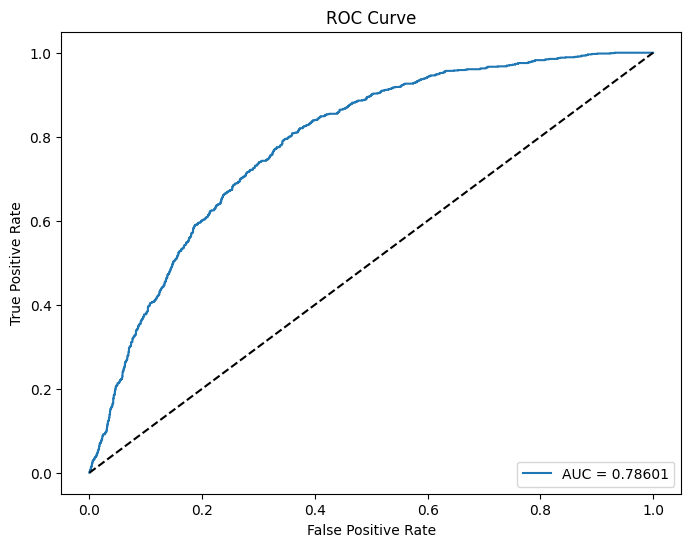

In [59]:
LR_model = LogisticRegression(max_iter=1000)
evaluate_model(LR_model, X_train, X_test, Y_train, Y_test)

### Random Forest

Accuracy: 0.72939
Recall: 0.46169

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        0.0                   0.47
4393     0.0        0.0                   0.01
4002     0.0        0.0                   0.48
8709     0.0        0.0                   0.46
5444     1.0        1.0                   0.54
1330     1.0        0.0                   0.26
6107     1.0        0.0                   0.49
6378     0.0        0.0                   0.45
6929     0.0        0.0                   0.35
6412     0.0        1.0                   0.52
3033     1.0        1.0                   0.55
960      1.0        1.0                   0.71
8770     1.0        1.0                   0.61
315      0.0        0.0                   0.18
7308     1.0        1.0                   0.61
6026     0.0        0.0                   0.03
6768     1.0        1.0                   0.55
1954     0.0        0.0                   0.00
2165     1.0        0.0                   0.15
214

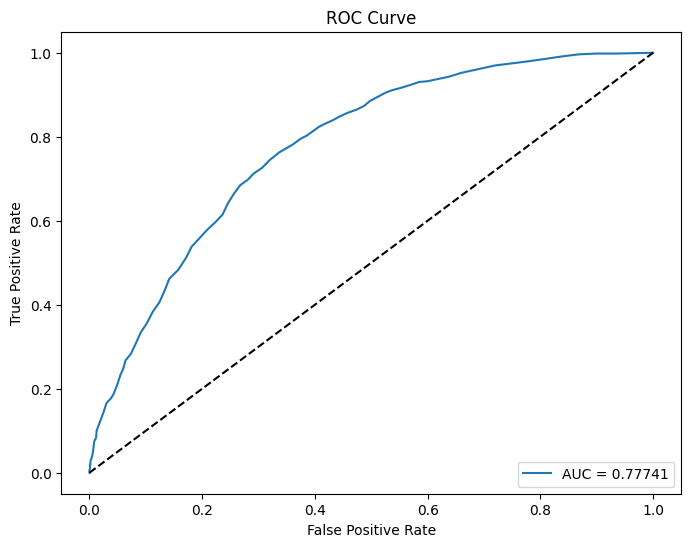

In [60]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(RF_model, X_train, X_test, Y_train, Y_test)

Accuracy: 0.73291
Recall: 0.47250

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.558693
4393     0.0        0.0               0.023316
4002     0.0        1.0               0.511737
8709     0.0        1.0               0.546300
5444     1.0        1.0               0.558610
1330     1.0        0.0               0.338432
6107     1.0        0.0               0.403716
6378     0.0        0.0               0.388234
6929     0.0        0.0               0.441581
6412     0.0        1.0               0.650703
3033     1.0        0.0               0.338010
960      1.0        1.0               0.631492
8770     1.0        1.0               0.607868
315      0.0        0.0               0.199353
7308     1.0        1.0               0.597850
6026     0.0        0.0               0.037134
6768     1.0        0.0               0.475546
1954     0.0        0.0               0.021373
2165     1.0        0.0               0.133916
214

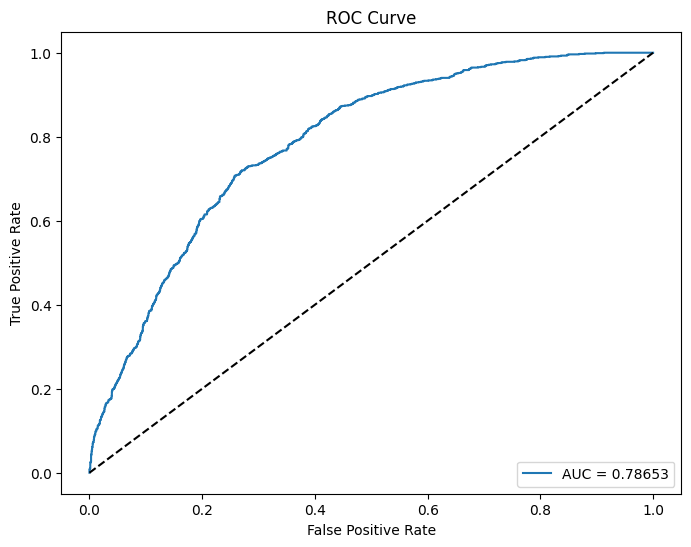

In [61]:
# Define the hyperparameters
rf_params = {
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': True
}

# Initialize the Random Forest classifier with the given hyperparameters
rf_model = RandomForestClassifier(**rf_params, random_state=42)

evaluate_model(rf_model, X_train, X_test, Y_train, Y_test)

### Catboost Classifier

Accuracy: 0.72780
Recall: 0.50196

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.575504
4393     0.0        0.0               0.009160
4002     0.0        0.0               0.406001
8709     0.0        0.0               0.422395
5444     1.0        1.0               0.714873
1330     1.0        0.0               0.304398
6107     1.0        0.0               0.302242
6378     0.0        0.0               0.380877
6929     0.0        1.0               0.535615
6412     0.0        1.0               0.634136
3033     1.0        0.0               0.429430
960      1.0        1.0               0.728481
8770     1.0        1.0               0.697841
315      0.0        0.0               0.200632
7308     1.0        1.0               0.811435
6026     0.0        0.0               0.022212
6768     1.0        1.0               0.529242
1954     0.0        0.0               0.017937
2165     1.0        0.0               0.126652
214

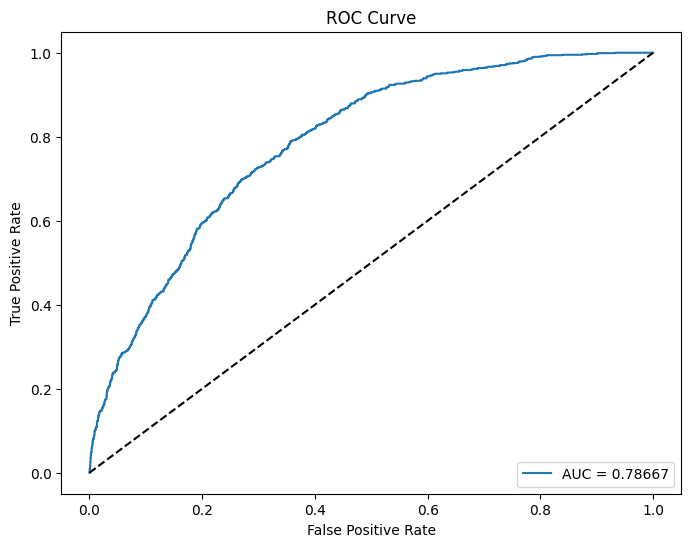

In [62]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist())
evaluate_model(catboost_model, X_train, X_test, Y_train, Y_test)

### Neural Network 

In [63]:
#{'solver': 'adam', 'nesterovs_momentum': False, 'momentum': 0.95, 'max_iter': 200, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'early_stopping': True, 'beta_2': 0.9, 'beta_1': 0.8, 'batch_size': 32, 'alpha': 0.01, 'activation': 'logistic'}

c:\Users\larry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.73355
Recall: 0.44499

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.571975
4393     0.0        0.0               0.008716
4002     0.0        0.0               0.241889
8709     0.0        0.0               0.463974
5444     1.0        1.0               0.608209
1330     1.0        0.0               0.307670
6107     1.0        0.0               0.363886
6378     0.0        0.0               0.309691
6929     0.0        0.0               0.399636
6412     0.0        1.0               0.637503
3033     1.0        0.0               0.322706
960      1.0        1.0               0.689072
8770     1.0        1.0               0.516836
315      0.0        0.0               0.204062
7308     1.0        1.0               0.582338
6026     0.0        0.0               0.026620
6768     1.0        1.0               0.527290
1954     0.0        0.0               0.020749
2165     1.0        0.0               0.122742
214

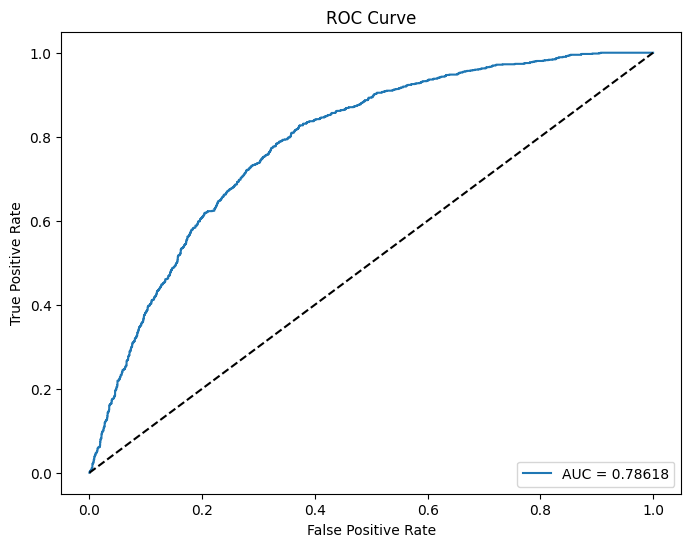

In [64]:
nn_model = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=100, random_state=42)
evaluate_model(nn_model, X_train, X_test, Y_train, Y_test)

In [65]:
# # Define the initial neural network model
# nn_model = MLPClassifier(random_state=42)

# # Define a more extensive parameter grid for random search
# param_distributions = {
#     'hidden_layer_sizes': [ (20,), (50,), (100,), (150,), (50, 50), (100, 50), (100, 100),],  # More layer combinations
#     'activation': ['tanh', 'logistic', 'identity'],  # Different activation functions
#     'solver': ['adam', 'sgd'],  # Solvers for weight optimization
#     'alpha': np.logspace(-5, -1, 5),  # L2 penalty (regularization) term
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
#     'learning_rate_init': np.logspace(-4, -1, 4),  # Initial learning rate
#     'max_iter': [100, 200, 300],  # Number of epochs
#     'batch_size': [16, 32],  # Size of minibatches
#     'momentum': [0.9, 0.95],  # Momentum for SGD solver
#     'nesterovs_momentum': [True, False],  # Whether to use Nesterov's momentum
#     'early_stopping': [True, False],  # Whether to use early stopping to terminate training
#     'beta_1': [0.8, 0.9],  # Exponential decay rate for estimates of first moment vector in adam
#     'beta_2': [0.9, 0.99],  # Exponential decay rate for estimates of second moment vector in adam
# }

# # Set up the RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=nn_model,
#     param_distributions=param_distributions,
#     n_iter=70,  # Number of parameter settings sampled
#     scoring='roc_auc',  # Scoring metric to use
#     n_jobs=-1,  # Use all available cores
#     cv=5,  # 5-fold cross-validation
#     verbose=3,  # Verbosity level
#     random_state=42  # Random state for reproducibility
# )

# # Assuming your data is already prepared in X_train and Y_train
# # Perform the random search
# random_search.fit(X_train, Y_train)

# # Print the best parameters and the best score from the random search
# print("Best parameters found by random search:")
# print(random_search.best_params_)

# print("\nBest AUC score from random search:")
# print(f"{random_search.best_score_:.5f}")

# # Optionally, evaluate the best model using your evaluation function
# best_nn_model = random_search.best_estimator_
# evaluate_model(best_nn_model, X_train, X_test, Y_train, Y_test)

## Feature Selection

In [66]:
def show_important_features(model_used):
    feature_names = X_train.keys()
    # Assuming feature_names is a list of feature names in the order they were used to train the model
    scores = model_used.feature_importances_
    
    # Sorting the features by their importance
    indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_scores = [scores[i] for i in indices]
    
    # Creating the horizontal bar chart
    plt.figure(figsize=(5, 6))
    plt.barh(sorted_feature_names, sorted_scores)
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return sorted_feature_names

In [67]:
# Creates an empty array to be populated
included_features_model = [[None] * 35 for _ in range(4)]

# Convert data to numpy arrays
X = np.asarray(X_train, dtype=np.float32)
Y = np.asarray(Y_train, dtype=np.float32)

In [68]:
def evaluate_features_with_rfe(model):
    # Define RFECV selector with StratifiedKFold cross-validation
    selector = RFE(model)

    # Fit RFECV selector to the data
    selector = selector.fit(X, Y)

    # Get the included features from the selector
    included_features = selector.support_

    # Update the included features for CatBoost model
    included_features_model[2] = included_features

    # Fit CatBoost model with the training data
    model.fit(X_train, Y_train)

    # Get important features from the trained CatBoost model
    droped = show_important_features(model)

### Random Forest

In [69]:
# evaluate_features_with_rfe(rf_model)

In [70]:
X_train_rfdropped = X_train.drop(columns=[ 'Smoker', 'SaltFreq', 'AlcConsump/Yr'])
X_test_rfdropped = X_test.drop(columns=[ 'Smoker', 'SaltFreq', 'AlcConsump/Yr'])

Accuracy: 0.73259
Recall: 0.47544

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.529956
4393     0.0        0.0               0.018713
4002     0.0        0.0               0.499137
8709     0.0        1.0               0.549694
5444     1.0        1.0               0.534377
1330     1.0        0.0               0.341028
6107     1.0        0.0               0.393240
6378     0.0        0.0               0.389785
6929     0.0        0.0               0.403548
6412     0.0        1.0               0.624748
3033     1.0        0.0               0.334189
960      1.0        1.0               0.666269
8770     1.0        1.0               0.601998
315      0.0        0.0               0.214543
7308     1.0        1.0               0.562759
6026     0.0        0.0               0.030965
6768     1.0        1.0               0.515803
1954     0.0        0.0               0.022495
2165     1.0        0.0               0.137008
214

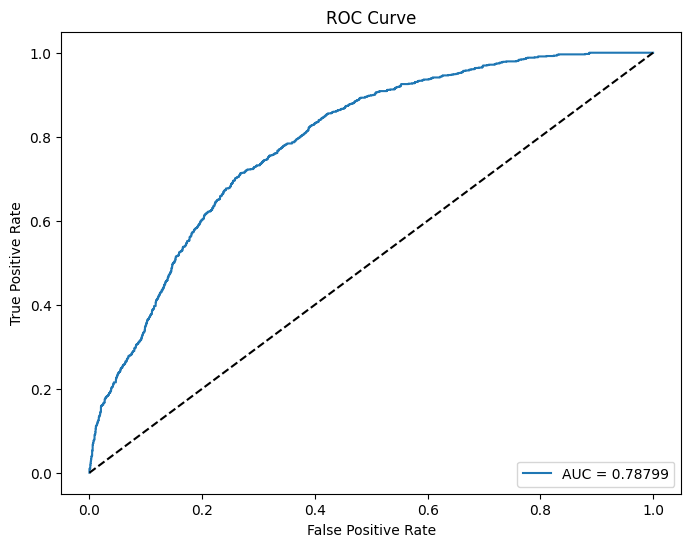

In [71]:
evaluate_model(rf_model, X_train_rfdropped, X_test_rfdropped, Y_train, Y_test)

In [72]:
test_rfdropped = df_scaled_testing.drop(columns=[ 'Smoker', 'SaltFreq', 'AlcConsump/Yr'])

### Catboost

In [73]:
# evaluate_features_with_rfe(catboost_model)

In [74]:
X_train_catdropped = X_train.drop(columns=['Smoker', 'AlcConsumpFreq','SaltFreq'])
X_test_catdropped = X_test.drop(columns=['Smoker', 'AlcConsumpFreq', 'SaltFreq'])

Accuracy: 0.72620
Recall: 0.48821

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.621942
4393     0.0        0.0               0.008271
4002     0.0        0.0               0.406441
8709     0.0        0.0               0.438819
5444     1.0        1.0               0.683965
1330     1.0        0.0               0.285197
6107     1.0        0.0               0.309637
6378     0.0        0.0               0.380419
6929     0.0        0.0               0.394310
6412     0.0        1.0               0.534278
3033     1.0        0.0               0.433018
960      1.0        1.0               0.683520
8770     1.0        1.0               0.682748
315      0.0        0.0               0.188185
7308     1.0        1.0               0.740913
6026     0.0        0.0               0.025297
6768     1.0        1.0               0.548152
1954     0.0        0.0               0.019932
2165     1.0        0.0               0.080162
214

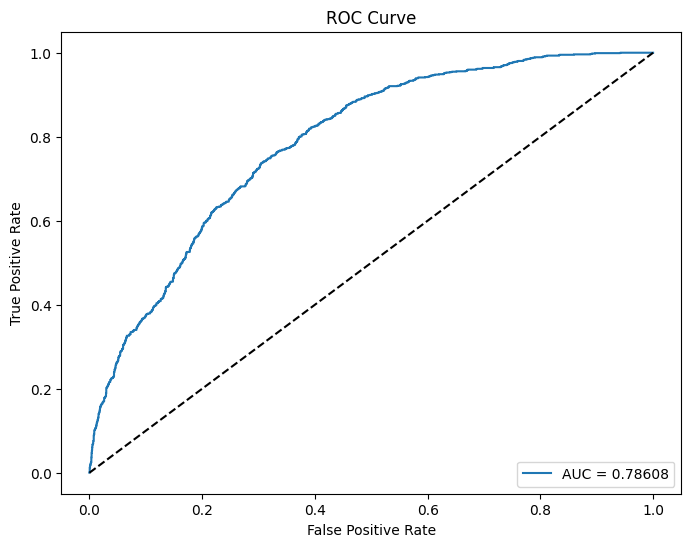

In [75]:
evaluate_model(catboost_model, X_train_catdropped, X_test_catdropped, Y_train, Y_test)

In [76]:
test_catdropped = df_scaled_testing.drop(columns=['Smoker', 'AlcConsumpFreq', 'SaltFreq'])

### Logistic Regression and Neural Networks

Logistic Regression and Neural Networks do not support RFE. Hence the commonly dropped features between Random Forest and Catboost are dropped 

In [77]:
X_train_remdropped = X_train.drop(columns=['Smoker', 'SaltFreq'])
X_test_remdropped = X_test.drop(columns=['Smoker', 'SaltFreq'])
test_rem = df_scaled_testing.drop(columns=['Smoker', 'SaltFreq'])

Accuracy: 0.73514
Recall: 0.47446

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.635653
4393     0.0        0.0               0.029409
4002     0.0        0.0               0.329018
8709     0.0        0.0               0.450991
5444     1.0        1.0               0.658814
1330     1.0        0.0               0.291824
6107     1.0        0.0               0.355667
6378     0.0        0.0               0.299893
6929     0.0        0.0               0.444105
6412     0.0        1.0               0.687571
3033     1.0        0.0               0.304275
960      1.0        1.0               0.829742
8770     1.0        1.0               0.685146
315      0.0        0.0               0.218907
7308     1.0        1.0               0.644279
6026     0.0        0.0               0.065465
6768     1.0        1.0               0.578327
1954     0.0        0.0               0.049900
2165     1.0        0.0               0.109718
214

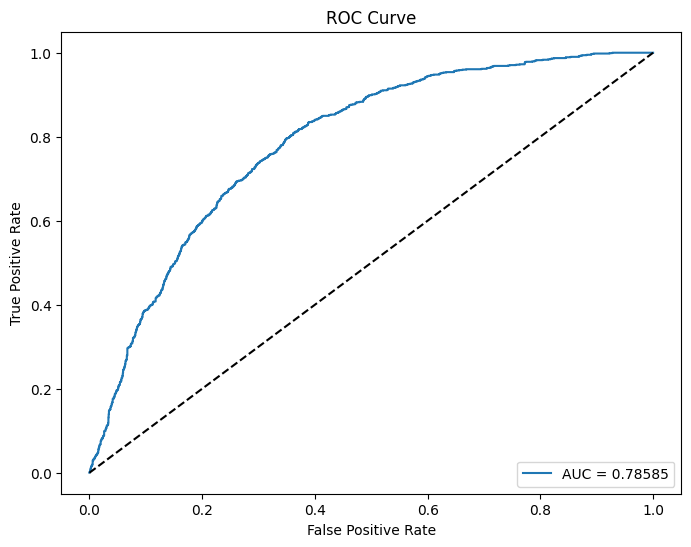

In [78]:
evaluate_model(LR_model, X_train_remdropped, X_test_remdropped, Y_train, Y_test)

c:\Users\larry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.73514
Recall: 0.50589

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.597217
4393     0.0        0.0               0.010653
4002     0.0        0.0               0.310643
8709     0.0        1.0               0.551685
5444     1.0        1.0               0.627332
1330     1.0        0.0               0.311640
6107     1.0        0.0               0.411348
6378     0.0        0.0               0.335337
6929     0.0        0.0               0.441836
6412     0.0        1.0               0.638260
3033     1.0        0.0               0.282274
960      1.0        1.0               0.770343
8770     1.0        1.0               0.665466
315      0.0        0.0               0.253419
7308     1.0        1.0               0.645783
6026     0.0        0.0               0.025847
6768     1.0        1.0               0.500231
1954     0.0        0.0               0.021691
2165     1.0        0.0               0.114923
214

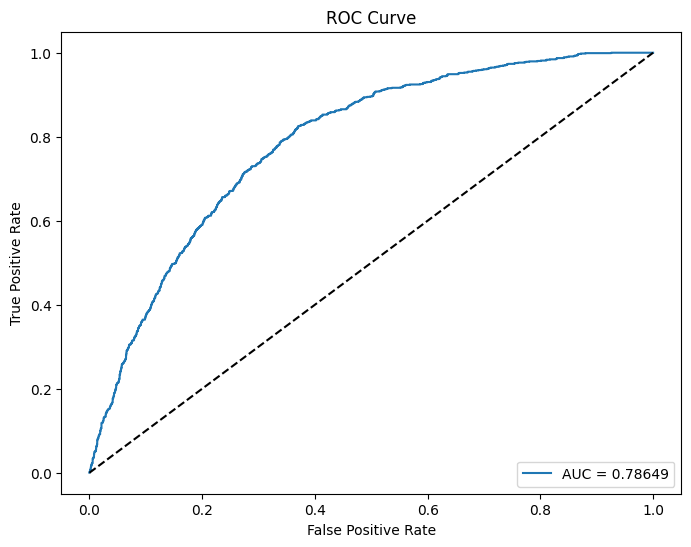

In [79]:
evaluate_model(nn_model, X_train_remdropped, X_test_remdropped, Y_train, Y_test)

### Hyperparameter Tuning

In [80]:
# # Initialize the RandomForestClassifier
# random_forest_model = RandomForestClassifier(random_state=42)

# # Define the parameter grid for random search
# param_distributions = {
#     'n_estimators': [100, 500, 1000, 1500],  # Number of trees in the forest
#     'max_features': ['sqrt', 'log2', None],       # Number of features to consider at each split
#     'max_depth': [None, 10, 30, 50],              # Maximum number of levels in each decision tree
#     'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required at each leaf node
#     'bootstrap': [True, False]                    # Method for sampling data points (with or without replacement)
# }

# # Define the RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=random_forest_model,
#     param_distributions=param_distributions,
#     n_iter=80,              # Number of parameter settings sampled
#     scoring='roc_auc',      # Scoring metric to use
#     n_jobs=-1,              # Use all available cores
#     cv=3,                   # 3-fold cross-validation (was previously 5 in the comments)
#     verbose=3,              # Verbosity level
#     random_state=42
# )

# # Perform the random search
# random_search.fit(X_train_rfdropped, Y_train)

# # Print the best parameters and the best score from the random search
# print("Best parameters found by random search:")
# print(random_search.best_params_)

# print("\nBest AUC score from random search:")
# print(f"{random_search.best_score_:.5f}")

# best_rf_model = random_search.best_estimator_
# evaluate_model(best_rf_model, X_train_rfdropped, X_test_rfdropped, Y_train, Y_test)

In [81]:
# # Initialize CatBoostClassifier
# catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist())

# # Define the hyperparameter grid
# param_grid = {
#     'iterations': [100, 300, 500],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5, 7],
#     'border_count': [32, 64, 128]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# grid_search.fit(X_train, Y_train)

# # Get the best model from grid search
# best_catboost_model = grid_search.best_estimator_

# # Train the model with the best parameters
# best_catboost_model.fit(X_train, Y_train)

# # Evaluate the best model using the provided evaluate_model function
# evaluate_model(best_catboost_model, X_train, X_test, Y_train, Y_test)

# # Output best parameters
# print("Best parameters found: ", grid_search.best_params_)

In [82]:
# #'scale_pos_weight': 1, 'random_strength': 1.0, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 3, 'border_count': 128, 'bagging_temperature': 0.0}
# # Initialize CatBoostClassifier
# catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist())

# # Define the hyperparameter grid
# param_grid = {
#     'iterations': [100, 200, 300],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5, 7],
#     'border_count': [32, 64, 128]
# }

# # Set up GridSearchCV
# # grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# # grid_search.fit(X_train, Y_train)

# # Get the best model from grid search
# # best_catboost_model = grid_search.best_estimator_

# # Manually set the best parameters
# best_params = {'border_count': 128, 'depth': 3, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
# best_catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist(), **best_params)

# # Train the model with the best parameters
# best_catboost_model.fit(X_train_catdropped, Y_train)

# # Evaluate the best model using the provided evaluate_model function
# evaluate_model(best_catboost_model, X_train_catdropped, X_test_catdropped, Y_train, Y_test)

# # Output best parameters
# print("Best parameters found: ",best_params)

In [83]:
# # Define the initial neural network model
# nn_model = MLPClassifier(random_state=42)

# # Define a more extensive parameter grid for random search
# param_distributions = {
#     'hidden_layer_sizes': [ (20,), (50,), (100,), (150,), (50, 50), (100, 50), (100, 100), (150, 100)],  # More layer combinations
#     'activation': ['relu', 'tanh', 'logistic', 'identity'],  # Different activation functions
#     'solver': ['adam', 'sgd', 'lbfgs'],  # Solvers for weight optimization
#     'alpha': np.logspace(-5, -1, 5),  # L2 penalty (regularization) term
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
#     'learning_rate_init': np.logspace(-4, -1, 4),  # Initial learning rate
#     'max_iter': [200, 350, 500],  # Number of epochs
#     'batch_size': [32, 64, 128, 256],  # Size of minibatches
#     'momentum': [0.9, 0.95, 0.99],  # Momentum for SGD solver
#     'nesterovs_momentum': [True, False],  # Whether to use Nesterov's momentum
#     'early_stopping': [True, False],  # Whether to use early stopping to terminate training
#     'beta_1': [0.8, 0.9, 0.99],  # Exponential decay rate for estimates of first moment vector in adam
#     'beta_2': [0.9, 0.99, 0.999],  # Exponential decay rate for estimates of second moment vector in adam
# }

# # Set up the RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=nn_model,
#     param_distributions=param_distributions,
#     n_iter=80,  # Number of parameter settings sampled
#     scoring='roc_auc',  # Scoring metric to use
#     n_jobs=-1,  # Use all available cores
#     cv=3,  # 5-fold cross-validation
#     verbose=3,  # Verbosity level
#     random_state=42  # Random state for reproducibility
# )

# # Assuming your data is already prepared in X_train and Y_train
# # Perform the random search
# random_search.fit(X_train_remdropped, Y_train)

# # Print the best parameters and the best score from the random search
# print("Best parameters found by random search:")
# print(random_search.best_params_)

# print("\nBest AUC score from random search:")
# print(f"{random_search.best_score_:.5f}")

# # Optionally, evaluate the best model using your evaluation function
# best_nn_model = random_search.best_estimator_
# evaluate_model(best_nn_model, X_train_remdropped, X_test_remdropped, Y_train, Y_test)

## Tuned Models

In [84]:
best_rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree
    min_samples_split=2, # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42      # Ensures reproducibility
)

Accuracy: 0.73355
Recall: 0.48232

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.503396
4393     0.0        0.0               0.024830
4002     0.0        0.0               0.428056
8709     0.0        1.0               0.552126
5444     1.0        1.0               0.574057
1330     1.0        0.0               0.315519
6107     1.0        0.0               0.400794
6378     0.0        0.0               0.396734
6929     0.0        0.0               0.367266
6412     0.0        1.0               0.613627
3033     1.0        0.0               0.313842
960      1.0        1.0               0.688086
8770     1.0        1.0               0.658956
315      0.0        0.0               0.227815
7308     1.0        1.0               0.613230
6026     0.0        0.0               0.033961
6768     1.0        1.0               0.561483
1954     0.0        0.0               0.025054
2165     1.0        0.0               0.173763
214

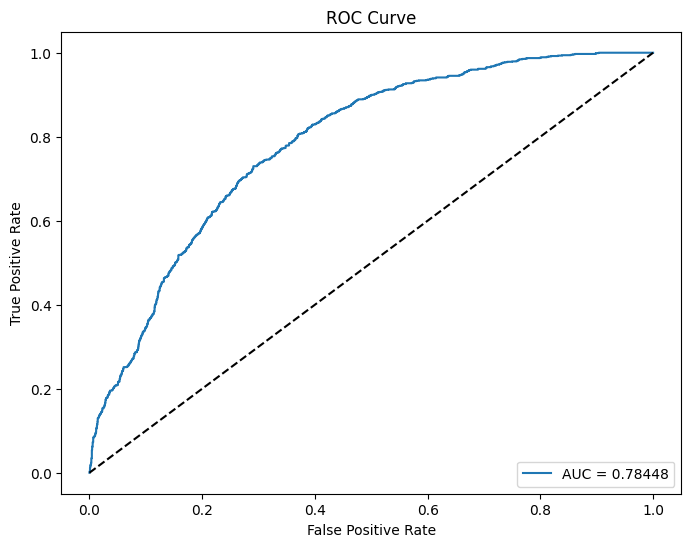

In [85]:
evaluate_model(best_rf_model, X_train_rfdropped, X_test_rfdropped, Y_train, Y_test)

In [86]:
best_catboost_model = CatBoostClassifier(
    border_count=128,
    depth=3,
    iterations=500,
    l2_leaf_reg=5,
    learning_rate=0.01,
    verbose=False  # set to True to see training logs
)

Accuracy: 0.73738
Recall: 0.51866

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.607783
4393     0.0        0.0               0.043872
4002     0.0        0.0               0.443190
8709     0.0        1.0               0.521707
5444     1.0        1.0               0.582774
1330     1.0        0.0               0.376535
6107     1.0        0.0               0.384193
6378     0.0        0.0               0.387966
6929     0.0        1.0               0.503335
6412     0.0        1.0               0.664046
3033     1.0        0.0               0.250915
960      1.0        1.0               0.640520
8770     1.0        1.0               0.609411
315      0.0        0.0               0.185317
7308     1.0        1.0               0.583232
6026     0.0        0.0               0.062206
6768     1.0        1.0               0.534623
1954     0.0        0.0               0.049003
2165     1.0        0.0               0.143927
214

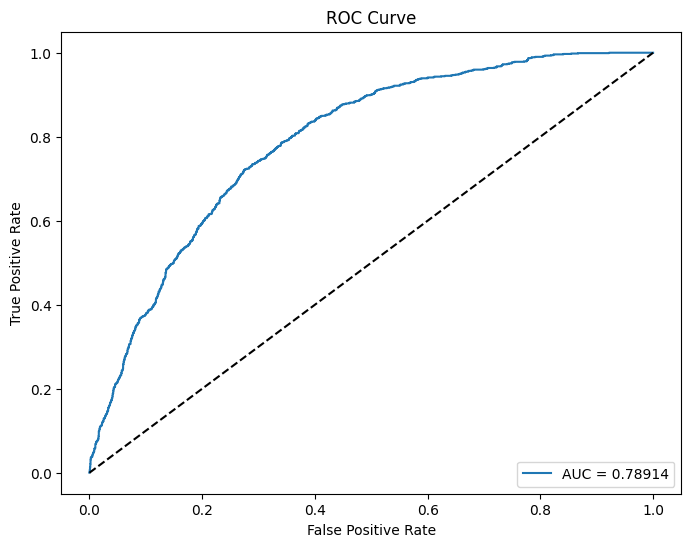

In [87]:
evaluate_model(best_catboost_model, X_train_catdropped, X_test_catdropped, Y_train, Y_test)

In [88]:
best_nn_model = MLPClassifier(
    solver='sgd',
    nesterovs_momentum=False,
    momentum=0.9,
    max_iter=350,
    learning_rate_init=0.01,
    learning_rate='constant',
    hidden_layer_sizes=(50,),
    early_stopping=False,
    beta_2=0.99,
    beta_1=0.8,
    batch_size=32,
    alpha=0.01,
    activation='relu',
    random_state=42
)

Accuracy: 0.73514
Recall: 0.46955

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
6110     0.0        1.0               0.598846
4393     0.0        0.0               0.008359
4002     0.0        0.0               0.357455
8709     0.0        1.0               0.519896
5444     1.0        1.0               0.543920
1330     1.0        0.0               0.214153
6107     1.0        0.0               0.344796
6378     0.0        0.0               0.284064
6929     0.0        0.0               0.435816
6412     0.0        1.0               0.630754
3033     1.0        0.0               0.295220
960      1.0        1.0               0.702693
8770     1.0        1.0               0.670468
315      0.0        0.0               0.167930
7308     1.0        1.0               0.579477
6026     0.0        0.0               0.018955
6768     1.0        1.0               0.509762
1954     0.0        0.0               0.015100
2165     1.0        0.0               0.080018
214

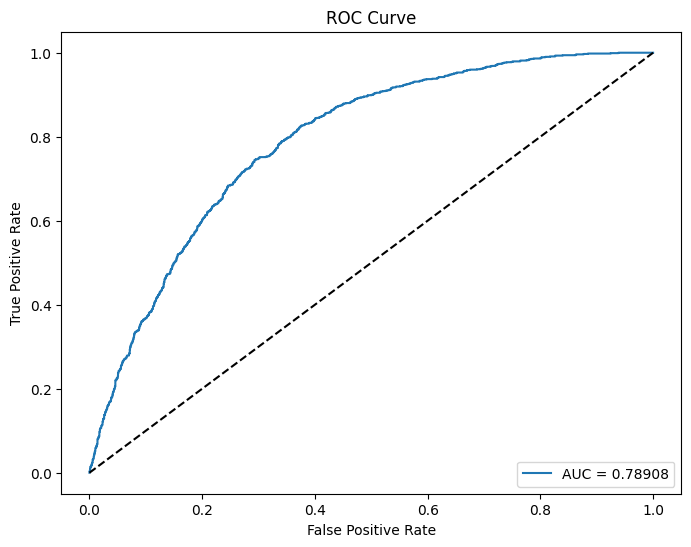

In [89]:
evaluate_model(best_nn_model, X_train_remdropped, X_test_remdropped, Y_train, Y_test)

## External Data Test

In [90]:
# Predict probabilities on df_scaled_11_12
pred_prob = LR_model.predict_proba(test_rem)[:, 1]

# Predict classes on df_scaled_11_12
pred_class = LR_model.predict(test_rem)

# Calculate accuracy
accuracy = accuracy_score(target_15_16, pred_class)

# Calculate AUC score
auc_score = roc_auc_score(target_15_16, pred_prob)

# Create a DataFrame with prediction probability, actual result, and predicted result
results_df = pd.DataFrame({
    'Prediction Probability': pred_prob,
    'Actual Result': target_15_16,
    'Predicted Result': pred_class
})

# Output the results
print("Accuracy: ", accuracy)
print("AUC Score: ", auc_score)
print("Results DataFrame:")
print(results_df.to_string())

Accuracy:  0.7524366471734892
AUC Score:  0.7813552850796001
Results DataFrame:
      Prediction Probability  Actual Result  Predicted Result
0                   0.059079            0.0               0.0
1                   0.048233            0.0               0.0
2                   0.044075            0.0               0.0
3                   0.279845            0.0               0.0
4                   0.090238            0.0               0.0
5                   0.106860            0.0               0.0
6                   0.172627            1.0               0.0
7                   0.085290            0.0               0.0
8                   0.445938            1.0               0.0
9                   0.638029            1.0               1.0
10                  0.231596            1.0               0.0
11                  0.125708            0.0               0.0
12                  0.293138            1.0               0.0
13                  0.243867            0.0         

In [91]:
# Predict probabilities on df_scaled_11_12
pred_prob = best_rf_model.predict_proba(test_rfdropped)[:, 1]

# Predict classes on df_scaled_11_12
pred_class = best_rf_model.predict(test_rfdropped)

# Calculate accuracy
accuracy = accuracy_score(target_15_16, pred_class)

# Calculate AUC score
auc_score = roc_auc_score(target_15_16, pred_prob)

# Create a DataFrame with prediction probability, actual result, and predicted result
results_df = pd.DataFrame({
    'Prediction Probability': pred_prob,
    'Actual Result': target_15_16,
    'Predicted Result': pred_class
})

# Output the results
print("Accuracy: ", accuracy)
print("AUC Score: ", auc_score)
print("Results DataFrame:")
print(results_df.to_string())

Accuracy:  0.7509746588693957
AUC Score:  0.7768569511292115
Results DataFrame:
      Prediction Probability  Actual Result  Predicted Result
0                   0.110942            0.0               0.0
1                   0.091019            0.0               0.0
2                   0.048746            0.0               0.0
3                   0.237520            0.0               0.0
4                   0.187049            0.0               0.0
5                   0.074271            0.0               0.0
6                   0.310369            1.0               0.0
7                   0.194360            0.0               0.0
8                   0.659206            1.0               1.0
9                   0.572716            1.0               1.0
10                  0.349073            1.0               0.0
11                  0.270166            0.0               0.0
12                  0.444152            1.0               0.0
13                  0.367755            0.0         

In [92]:
# Predict probabilities on df_scaled_11_12
pred_prob = best_catboost_model.predict_proba(test_catdropped)[:, 1]

# Predict classes on df_scaled_11_12
pred_class = best_catboost_model.predict(test_catdropped)

# Calculate accuracy
accuracy = accuracy_score(target_15_16, pred_class)

# Calculate AUC score
auc_score = roc_auc_score(target_15_16, pred_prob)

# Create a DataFrame with prediction probability, actual result, and predicted result
results_df = pd.DataFrame({
    'Prediction Probability': pred_prob,
    'Actual Result': target_15_16,
    'Predicted Result': pred_class
})

# Output the results
print("Accuracy: ", accuracy)
print("AUC Score: ", auc_score)
print("Results DataFrame:")
print(results_df.to_string())

Accuracy:  0.7514619883040936
AUC Score:  0.7895443817104776
Results DataFrame:
      Prediction Probability  Actual Result  Predicted Result
0                   0.104523            0.0               0.0
1                   0.093424            0.0               0.0
2                   0.058502            0.0               0.0
3                   0.306984            0.0               0.0
4                   0.113245            0.0               0.0
5                   0.081407            0.0               0.0
6                   0.186966            1.0               0.0
7                   0.132072            0.0               0.0
8                   0.560945            1.0               1.0
9                   0.629028            1.0               1.0
10                  0.239425            1.0               0.0
11                  0.204739            0.0               0.0
12                  0.301755            1.0               0.0
13                  0.323128            0.0         

In [93]:
# Predict probabilities on df_scaled_11_12
pred_prob = best_nn_model.predict_proba(test_rem)[:, 1]

# Predict classes on df_scaled_11_12
pred_class = best_nn_model.predict(test_rem)

# Calculate accuracy
accuracy = accuracy_score(target_15_16, pred_class)

# Calculate AUC score
auc_score = roc_auc_score(target_15_16, pred_prob)

# Create a DataFrame with prediction probability, actual result, and predicted result
results_df = pd.DataFrame({
    'Prediction Probability': pred_prob,
    'Actual Result': target_15_16,
    'Predicted Result': pred_class
})

# Output the results
print("Accuracy: ", accuracy)
print("AUC Score: ", auc_score)
print("Results DataFrame:")
print(results_df.to_string())

Accuracy:  0.7456140350877193
AUC Score:  0.7840973250647907
Results DataFrame:
      Prediction Probability  Actual Result  Predicted Result
0                   0.081550            0.0               0.0
1                   0.059863            0.0               0.0
2                   0.044007            0.0               0.0
3                   0.281041            0.0               0.0
4                   0.107678            0.0               0.0
5                   0.145651            0.0               0.0
6                   0.326244            1.0               0.0
7                   0.131663            0.0               0.0
8                   0.590837            1.0               1.0
9                   0.619405            1.0               1.0
10                  0.390307            1.0               0.0
11                  0.260439            0.0               0.0
12                  0.450334            1.0               0.0
13                  0.276774            0.0         

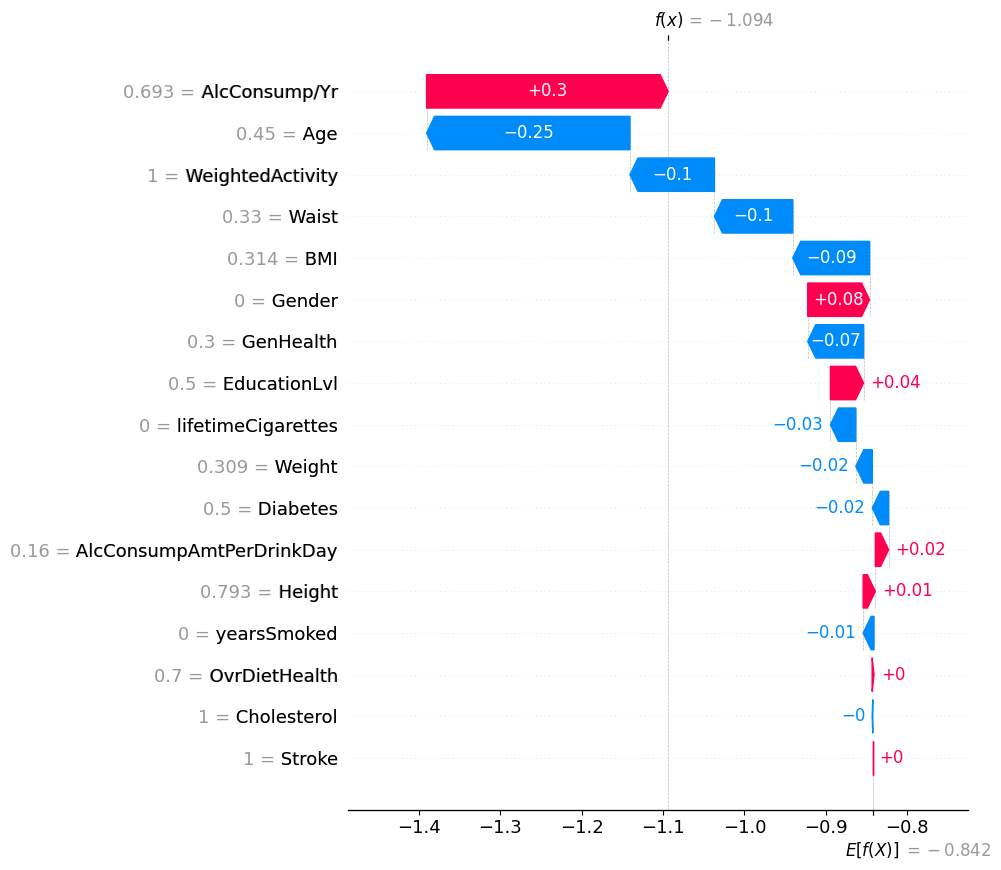

In [94]:
instance = X_test_catdropped.iloc[[10]]
# Create a SHAP explainer
explainer = shap.Explainer(best_catboost_model, X_train_catdropped)

# Calculate SHAP values for the test set
shap_values = explainer(instance)

# Visualize the SHAP values
# shap.summary_plot(shap_values, instance)
# Adjust max_display to show all features
shap.plots.waterfall(shap_values[0], max_display=20)  # Set max_display to None or a large number


PermutationExplainer explainer: 5812it [49:36,  1.91it/s]                               


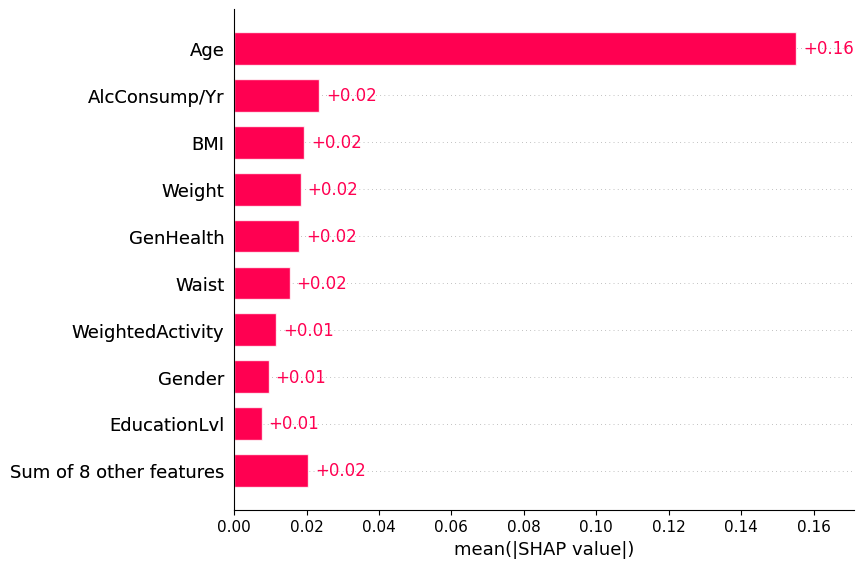

In [95]:
masker = shap.maskers.Independent(data=X_train_catdropped)

def catboost_predict_proba(data):
    return best_catboost_model.predict_proba(data)[:, 1]

explainer = shap.Explainer(catboost_predict_proba, masker)
shap_values = explainer(X_train_catdropped)

shap.plots.bar(shap_values)


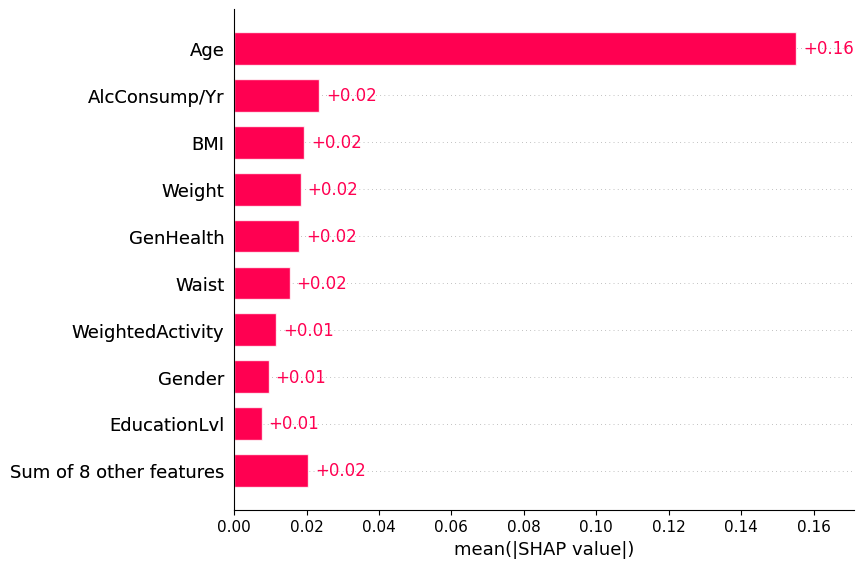

In [96]:
shap.plots.bar(shap_values)